In [28]:
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet
from re import I
from tensorflow.python.keras import backend as K
import matplotlib.pyplot as plt


In [29]:
import tensorflow as tf
tf.__version__
tf.test.gpu_device_name()

'/device:GPU:0'

In [30]:
K.clear_session()
data_entrenamiento = './data/train'
data_validacion = './data/validation'

In [31]:
epocas = 50 #numero de veces q se va a iterar sobre el set de datos.
width_shape = 224
height_shape = 224 # tamano al cual vamos a procesar las imagenes
batch_size = 64 #cantidad de imagenes que enviamos a procesar en cada uno de los pasos
clases=2 #tipo de imagenes q vamos a enviar
lr=0.0005 #determina el tamano de los ajustes que ara nuestra red neuronal

In [32]:
train_datagen = ImageDataGenerator()
valid_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    class_mode='categorical')
print(train_generator)
validation_generator = valid_datagen.flow_from_directory(
    data_validacion,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    class_mode='categorical')

Found 10682 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.


In [33]:
print('#Entrenamiento de modelo Mobilenet')

nb_train_samples = 10682
nb_validation_samples = 3562
image_input = Input(shape=(width_shape, height_shape, 3))
m_MobileNet = MobileNet(input_tensor=image_input, include_top=False,weights='imagenet')
last_layer = m_MobileNet.layers[-1].output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x=Dropout(0.3)(x)
x = Dense(128, activation='relu', name='fc2')(x)
x=Dropout(0.3)(x)
out = Dense(clases, activation='softmax', name='output')(x)
custom_model = Model(image_input, out)
custom_model.summary()
custom_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

#Entrenamiento de modelo Mobilenet
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                   

In [7]:
model_history = custom_model.fit(
    train_generator,
    epochs=epocas,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

Epoch 1/50
166/166 [==============================] - 113s 621ms/step - loss: 0.9522 - accuracy: 0.5947 - val_loss: 0.4745 - val_accuracy: 0.7898
Epoch 2/50
166/166 [==============================] - 73s 439ms/step - loss: 0.6087 - accuracy: 0.7241 - val_loss: 0.3307 - val_accuracy: 0.8713
Epoch 3/50
166/166 [==============================] - 73s 440ms/step - loss: 0.4884 - accuracy: 0.7846 - val_loss: 0.2734 - val_accuracy: 0.8929
Epoch 4/50
166/166 [==============================] - 72s 435ms/step - loss: 0.4040 - accuracy: 0.8316 - val_loss: 0.2420 - val_accuracy: 0.9017
Epoch 5/50
166/166 [==============================] - 72s 434ms/step - loss: 0.3478 - accuracy: 0.8584 - val_loss: 0.2228 - val_accuracy: 0.9148
Epoch 6/50
166/166 [==============================] - 72s 431ms/step - loss: 0.3262 - accuracy: 0.8701 - val_loss: 0.2107 - val_accuracy: 0.9210
Epoch 7/50
166/166 [==============================] - 72s 431ms/step - loss: 0.2933 - accuracy: 0.8892 - val_loss: 0.2044 - val_a

In [8]:
custom_model.save("./modelos/model_Mobilenet.h5")

In [4]:
def plotTraining(hist, epochs, typeData):
    if typeData == "loss":
        plt.figure(1, figsize=(10, 5))
        yc = hist.history['loss']
        xc = range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc, yc, '-r', label='Loss Training')
    if typeData == "accuracy":
        plt.figure(2, figsize=(10, 5))
        yc = hist.history['accuracy']
        for i in range(0, len(yc)):
            yc[i] = 100 * yc[i]
        xc = range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc, yc, '-r', label='Accuracy Training')
    if typeData == "val_loss":
        plt.figure(1, figsize=(10, 5))
        yc = hist.history['val_loss']
        xc = range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc, yc, '--b', label='Loss Validate')
    if typeData == "val_accuracy":
        plt.figure(2, figsize=(10, 5))
        yc = hist.history['val_accuracy']
        for i in range(0, len(yc)):
            yc[i] = 100 * yc[i]
        xc = range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc, yc, '--b', label='Training Validate')

    plt.rc('xtick', labelsize=24)
    plt.rc('ytick', labelsize=24)
    plt.rc('legend', fontsize=18)
    plt.legend()
    plt.xlabel('Number of Epochs', fontsize=24)
    plt.grid(True)



In [5]:
plotTraining(model_history,epocas,"loss")
plotTraining(model_history,epocas,"accuracy")
plotTraining(model_history,epocas,"val_loss")
plotTraining(model_history,epocas,"val_accuracy")

NameError: name 'model_history' is not defined

In [6]:
import matplotlib.pyplot as plt
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model
import numpy as np
import cv2

width_shape = 224
height_shape = 224

names = ['MELANOMA', 'NO_MELANOMA']

modelt = load_model("./modelos/model_Mobilenet.h5")
#modelt = custom_vgg_model

imaget_path = "melanoma3.jpg"
imaget=cv2.resize(cv2.imread(imaget_path), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
print(imaget)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = modelt.predict(xt)
print(preds)
print(names[np.argmax(preds)])


plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


Found 3560 images belonging to 2 classes.


C:\Users\LENOVO LEGION Y545\AppData\Local\Temp\ipykernel_18300\96138456.py:30: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = custom_Model.predict_generator(generator=test_generator)


              precision    recall  f1-score   support

           0     0.9643    0.8955    0.9286      1780
           1     0.9025    0.9669    0.9336      1780

    accuracy                         0.9312      3560
   macro avg     0.9334    0.9312    0.9311      3560
weighted avg     0.9334    0.9312    0.9311      3560



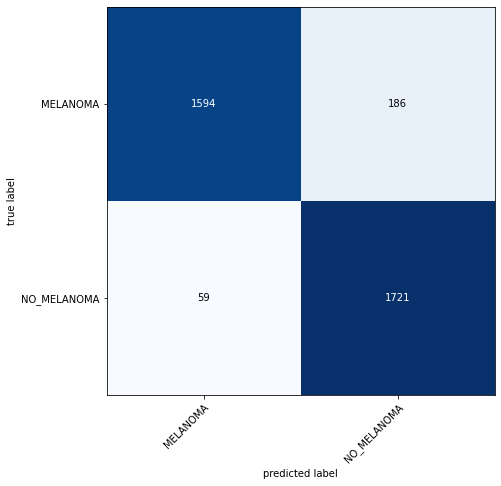

In [2]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

width_shape = 224
height_shape = 224 # tamano al cual vamos a procesar las imagenes
batch_size = 3

names = ['MELANOMA','NO_MELANOMA']

test_data_dir = './data/test'
test_datagen = ImageDataGenerator()
    
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

custom_Model= load_model("./modelos/model_Mobilenet.h5")

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes

matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(7,7), class_names = names, show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4))